# Part 5: Feature Selection

In [47]:
import pandas as pd
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import SelectFpr
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
selectModel = RandomForestClassifier(n_estimators=100)

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# import warnings
# warnings.filterwarnings("ignore")

In [21]:
df = pd.read_csv("energy_consumption.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 34 columns):
date              19735 non-null object
Appliances        19735 non-null int64
lights            19735 non-null int64
T1                19735 non-null float64
RH_1              19735 non-null float64
T2                19735 non-null float64
RH_2              19735 non-null float64
T3                19735 non-null float64
RH_3              19735 non-null float64
T4                19735 non-null float64
RH_4              19735 non-null float64
T5                19735 non-null float64
RH_5              19735 non-null float64
T6                19735 non-null float64
RH_6              19735 non-null float64
T7                19735 non-null float64
RH_7              19735 non-null float64
T8                19735 non-null float64
RH_8              19735 non-null float64
T9                19735 non-null float64
RH_9              19735 non-null float64
T_out             19735 non-null fl

In [22]:
df = df.drop(['date','week_of_day','week_status','week'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 30 columns):
Appliances        19735 non-null int64
lights            19735 non-null int64
T1                19735 non-null float64
RH_1              19735 non-null float64
T2                19735 non-null float64
RH_2              19735 non-null float64
T3                19735 non-null float64
RH_3              19735 non-null float64
T4                19735 non-null float64
RH_4              19735 non-null float64
T5                19735 non-null float64
RH_5              19735 non-null float64
T6                19735 non-null float64
RH_6              19735 non-null float64
T7                19735 non-null float64
RH_7              19735 non-null float64
T8                19735 non-null float64
RH_8              19735 non-null float64
T9                19735 non-null float64
RH_9              19735 non-null float64
T_out             19735 non-null float64
Press_mm_hg       19735 non-null f

## Removing features with low varaince


In [23]:
df.shape

(19735, 30)

In [24]:
selector = VarianceThreshold(threshold=.5)
selector.fit_transform(df)
df.shape

(19735, 30)

## Univariate feature selection

In [25]:
y = df['Appliances']
x = df.drop(['Appliances'], axis=1)
x.shape

(19735, 29)

#### Comparison of F-test and mutual information
http://scikit-learn.org/stable/auto_examples/feature_selection/plot_f_test_vs_mi.html#sphx-glr-auto-examples-feature-selection-plot-f-test-vs-mi-py

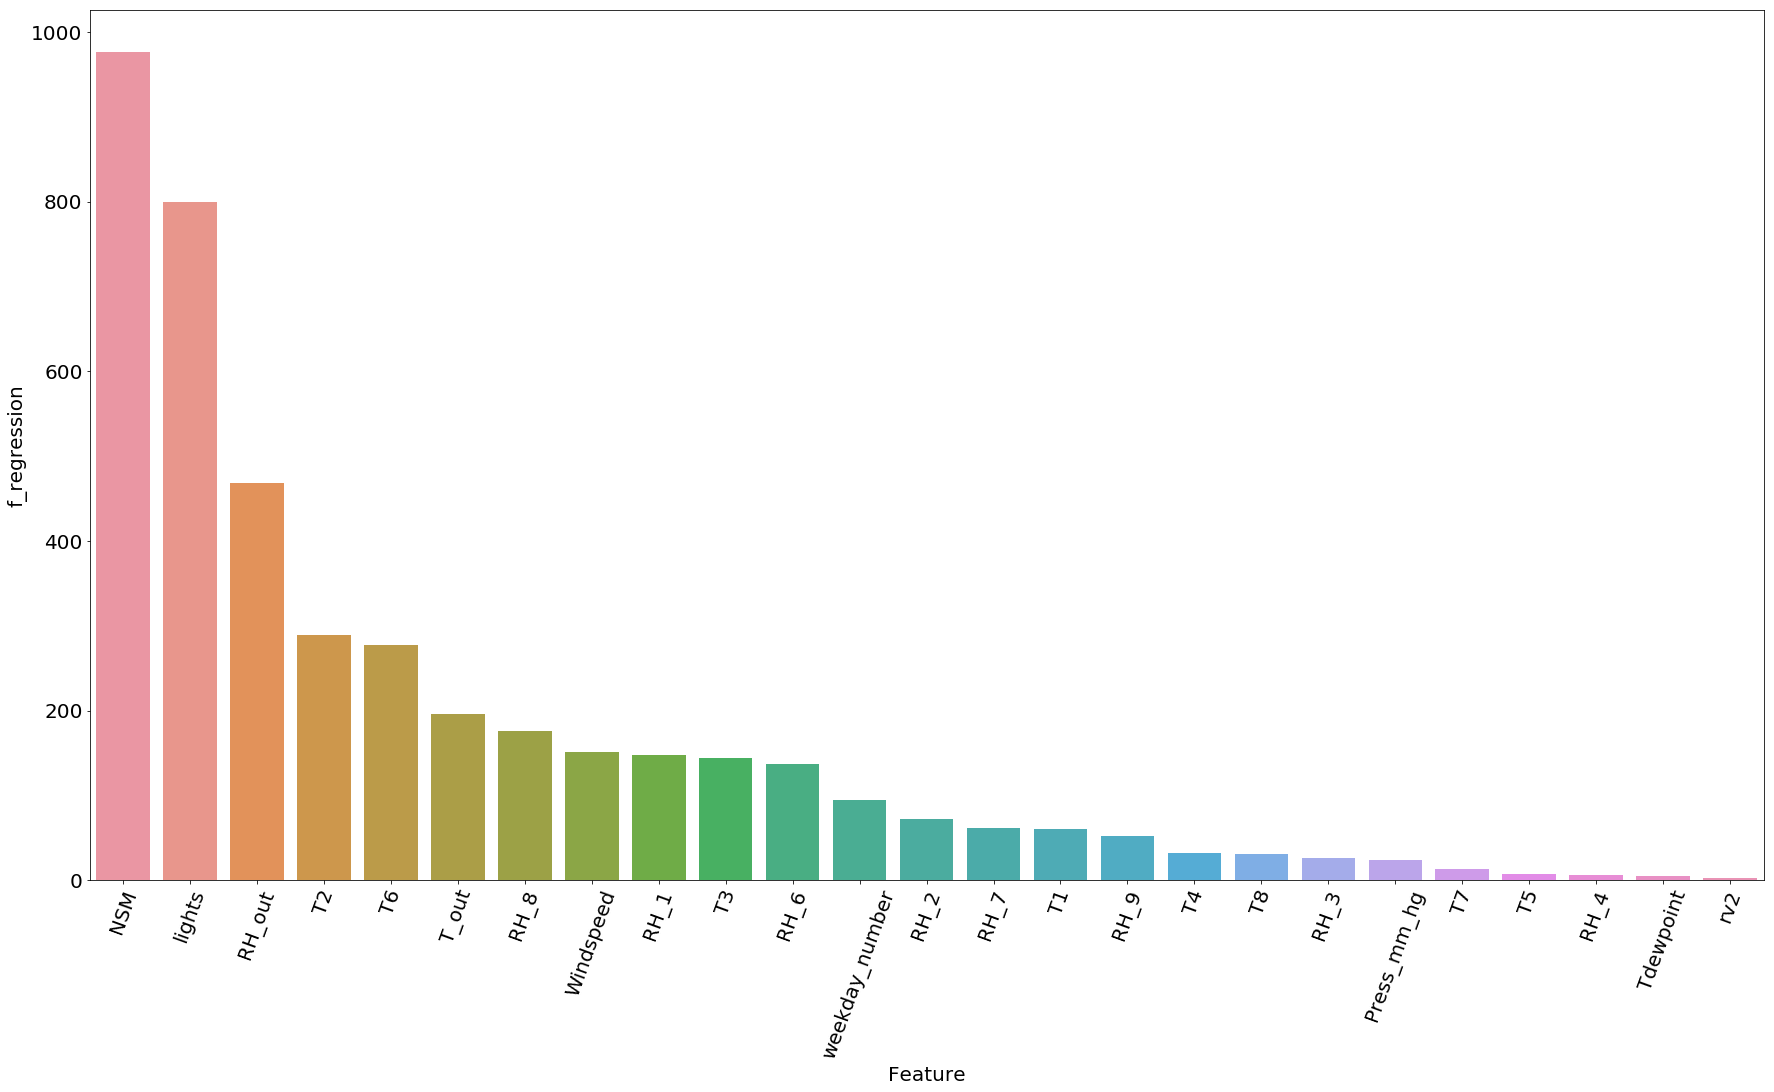

In [26]:
selector = SelectKBest(f_regression, k=25).fit(x,y)
names = x.columns.values[selector.get_support()]
scores = selector.scores_[selector.get_support()]
names_scores=list(zip(names,scores))
ns_df = pd.DataFrame(data = names_scores, columns=['name','f_regression'])
f_test_df = ns_df.sort_values('f_regression',ascending = False)

def displayScores(ns_df, score):
    plt.figure(figsize=(30,16))
    sns.barplot(x ='name', y=score, data=ns_df)
    plt.xticks(rotation=70, fontsize=20)
    plt.xlabel('Feature',fontsize=20)
    plt.yticks(fontsize=20)
    plt.ylabel(score,fontsize=20)
    plt.show()

displayScores(f_test_df,'f_regression')


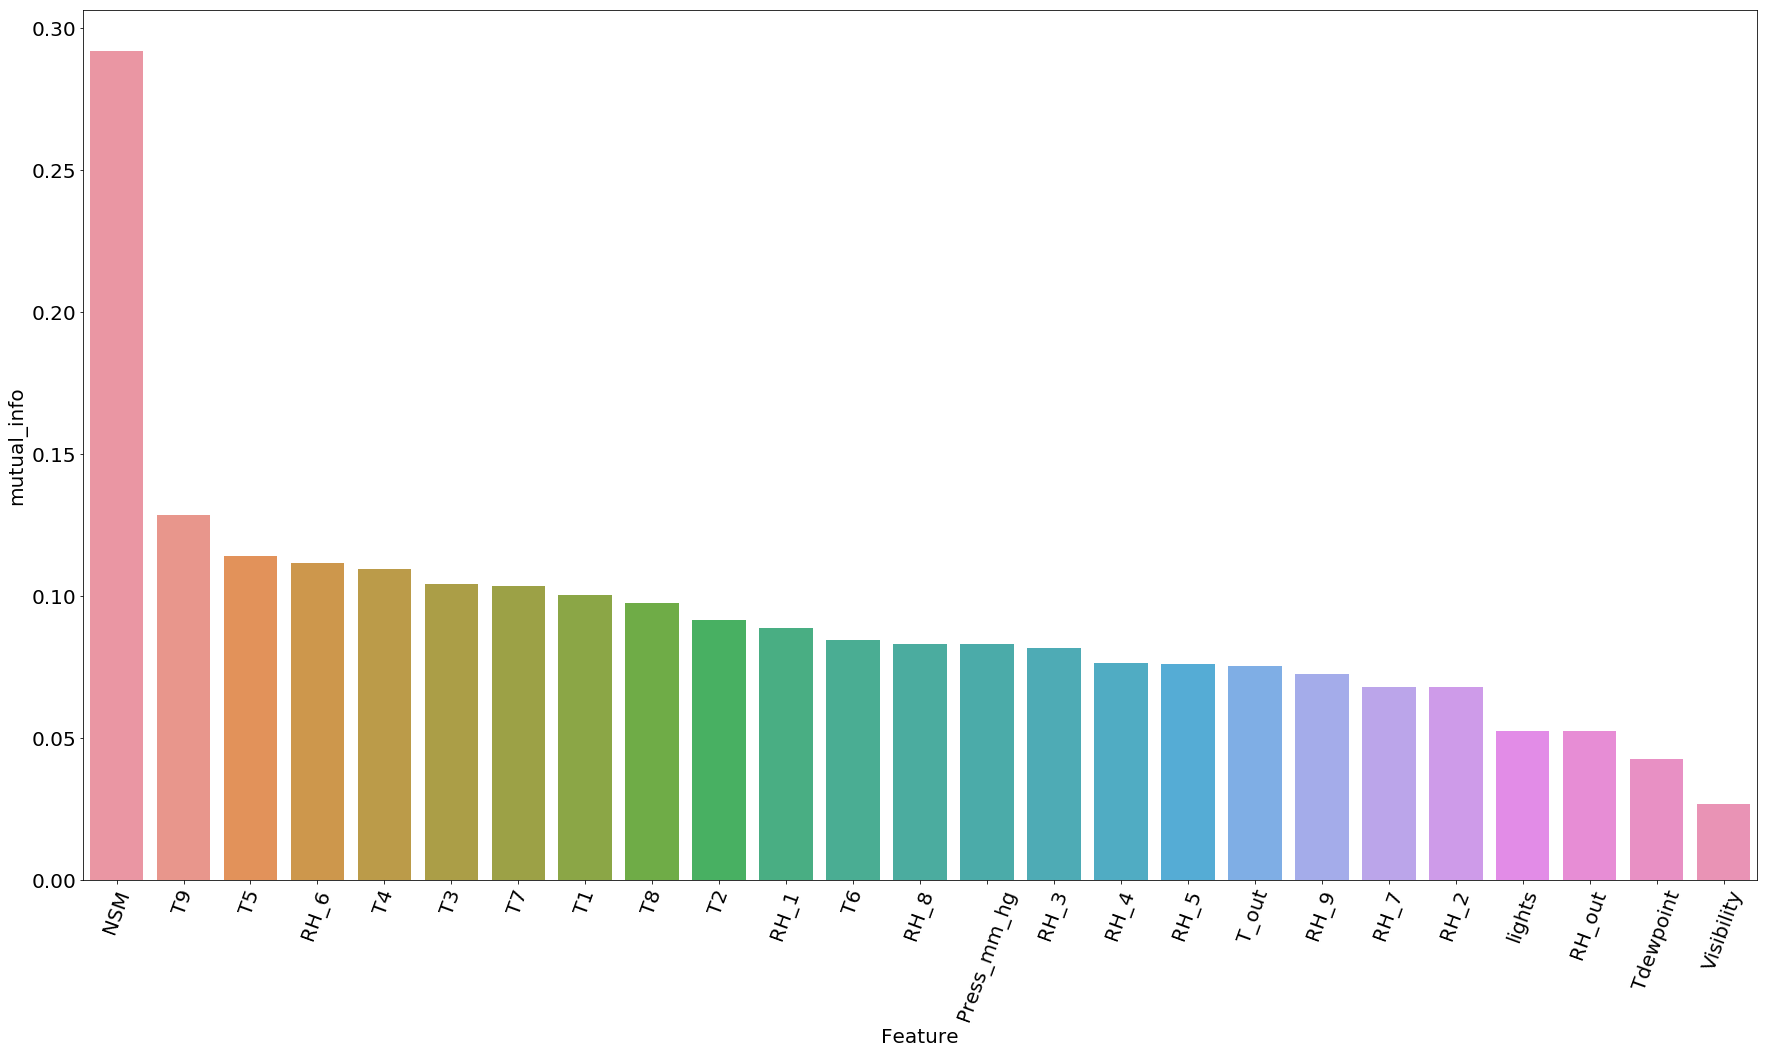

In [27]:
selector = SelectKBest(mutual_info_regression, k=25).fit(x,y)
names = x.columns.values[selector.get_support()]
scores = selector.scores_[selector.get_support()]
names_scores=list(zip(names,scores))
ns_df = pd.DataFrame(data = names_scores, columns=['name','mutual_info'])
mutual_info_df = ns_df.sort_values('mutual_info',ascending = False)

displayScores(mutual_info_df,'mutual_info')


(22, 2)


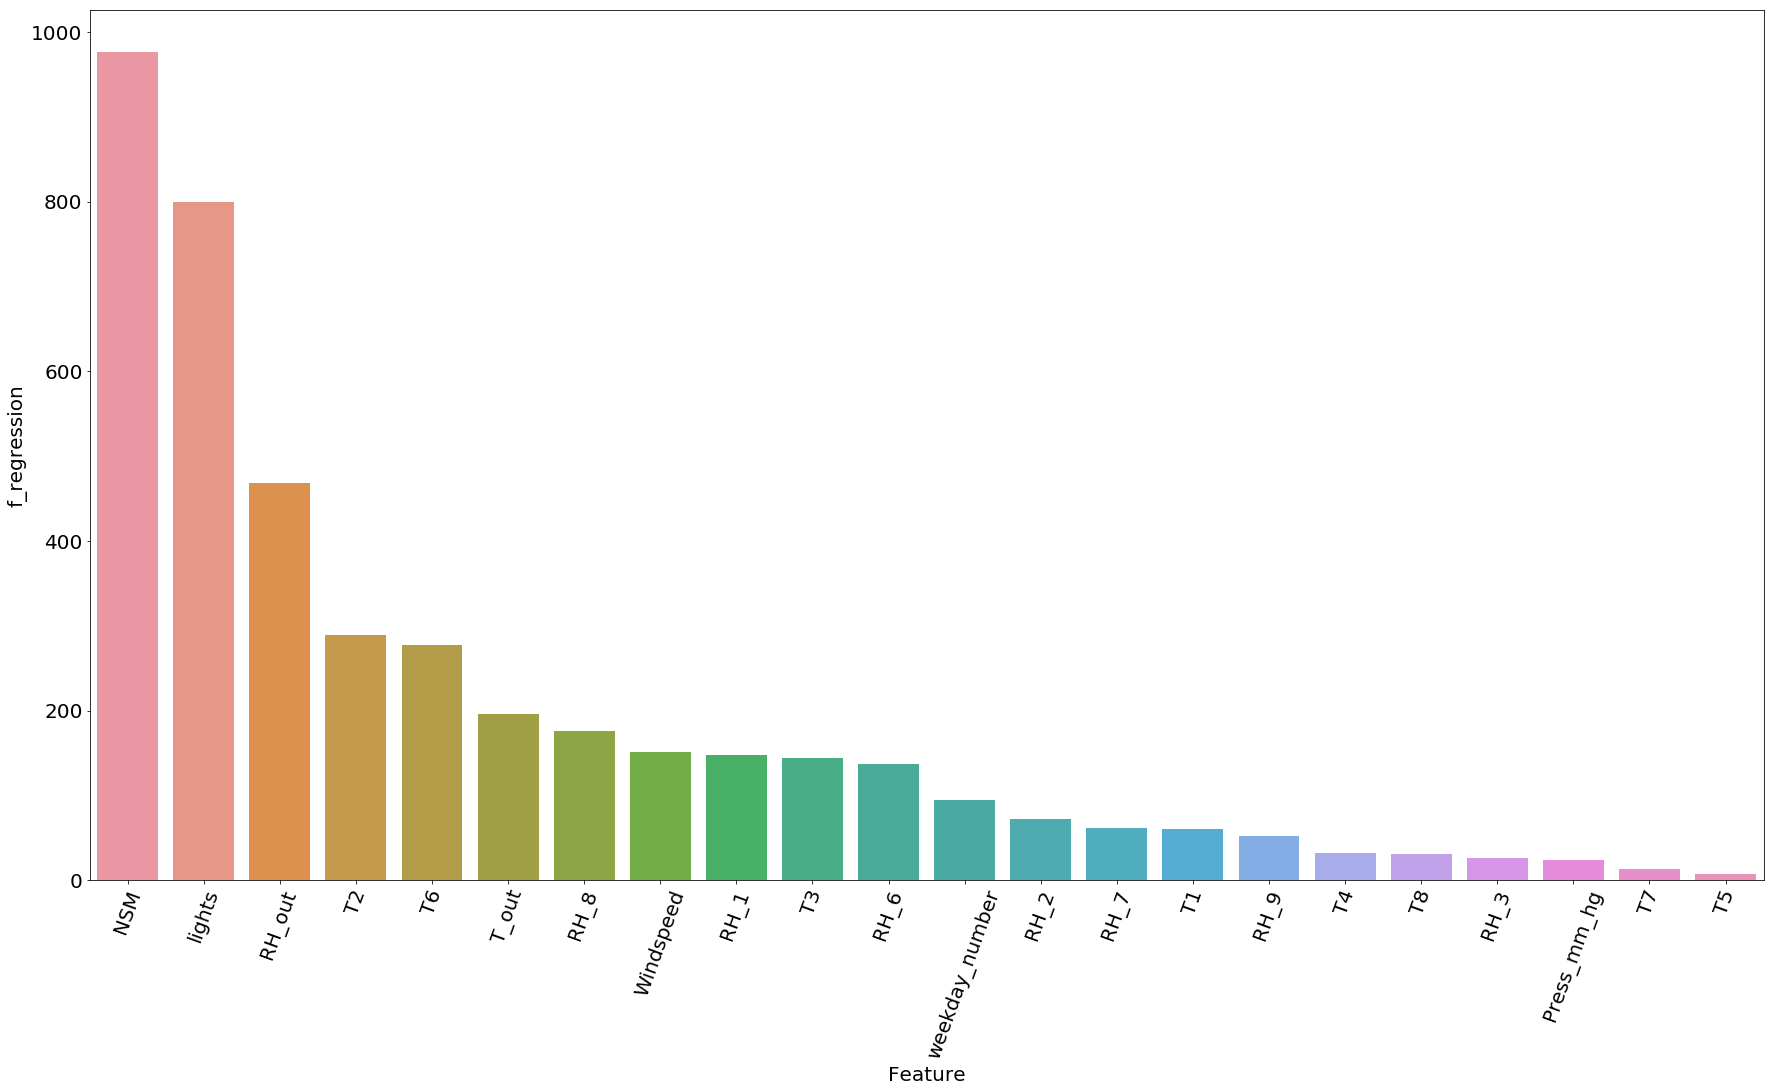

In [28]:
selector = SelectFpr(f_regression,alpha=0.01).fit(x,y)
names = x.columns.values[selector.get_support()]
scores = selector.scores_[selector.get_support()]
names_scores=list(zip(names,scores))
ns_df = pd.DataFrame(data = names_scores, columns=['name','f_regression'])
fpr_df = ns_df.sort_values('f_regression',ascending = False)
print(fpr_df.shape)
displayScores(fpr_df,'f_regression')

#### Combine result:

In [29]:
selectName = set(f_test_df['name']).intersection(set(mutual_info_df['name']))\
.intersection(set(set(fpr_df['name'])))
print(len(selectName))
selectName

20


{'NSM',
 'Press_mm_hg',
 'RH_1',
 'RH_2',
 'RH_3',
 'RH_6',
 'RH_7',
 'RH_8',
 'RH_9',
 'RH_out',
 'T1',
 'T2',
 'T3',
 'T4',
 'T5',
 'T6',
 'T7',
 'T8',
 'T_out',
 'lights'}

## Recursive feature elimination

In [30]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.5, random_state=0)
x_train.shape


(9867, 29)

In [31]:
from sklearn.feature_selection import RFE

selector = RFE(selectModel, 25, step = 1).fit(x_train,y_train)

In [32]:
names = x_train.columns.values[selector.get_support()]
scores = selector.ranking_[selector.get_support()]
names_scores=list(zip(names,scores))
ns_df = pd.DataFrame(data = names_scores, columns=['name','ranking'])
rfe_df = ns_df.sort_values('ranking')
rfe_df

,name,ranking
0,T1,1
22,rv1,1
21,Tdewpoint,1
20,Windspeed,1
19,RH_out,1
18,Press_mm_hg,1
17,T_out,1
16,RH_9,1
15,RH_8,1
14,T8,1


In [33]:
selectName = selectName.intersection(set(rfe_df['name']))
print(len(selectName))
selectName

19


{'NSM',
 'Press_mm_hg',
 'RH_1',
 'RH_2',
 'RH_3',
 'RH_6',
 'RH_7',
 'RH_8',
 'RH_9',
 'RH_out',
 'T1',
 'T2',
 'T3',
 'T4',
 'T5',
 'T6',
 'T7',
 'T8',
 'T_out'}

## Feature selection using SelectFromModel

### L1-based feature selection

In [34]:
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel

lsvc = LinearSVC(C=0.01, penalty="l1", dual=False).fit(x_train, y_train)
model = SelectFromModel(lsvc,prefit=True)
x_new = model.transform(x_train)
names = x.columns.values[model.get_support()]

print(names.shape)
names.tolist()

(29,)


['lights',
 'T1',
 'RH_1',
 'T2',
 'RH_2',
 'T3',
 'RH_3',
 'T4',
 'RH_4',
 'T5',
 'RH_5',
 'T6',
 'RH_6',
 'T7',
 'RH_7',
 'T8',
 'RH_8',
 'T9',
 'RH_9',
 'T_out',
 'Press_mm_hg',
 'RH_out',
 'Windspeed',
 'Visibility',
 'Tdewpoint',
 'rv1',
 'rv2',
 'weekday_number',
 'NSM']

### Tree-based feature selection

In [35]:
from sklearn.ensemble import ExtraTreesClassifier


selector = selectModel.fit(x_train,y_train)

names = x.columns.values
scores = selector.feature_importances_
names_scores=list(zip(names,scores))
ns_df = pd.DataFrame(data = names_scores, columns=['name','importance'])
etc_df = ns_df.sort_values('importance',ascending=False)
etc_df

,name,importance
28,NSM,0.066900
26,rv2,0.042715
25,rv1,0.042633
16,RH_8,0.040227
10,RH_5,0.039359
20,Press_mm_hg,0.039118
11,T6,0.038309
15,T8,0.038175
18,RH_9,0.037664
21,RH_out,0.037606


In [36]:
model = SelectFromModel(selector,prefit=True)
names = x.columns.values[model.get_support()]
print(names.shape)
names.tolist()

(18,)


['RH_1',
 'T2',
 'RH_2',
 'RH_3',
 'RH_5',
 'T6',
 'RH_6',
 'RH_7',
 'T8',
 'RH_8',
 'RH_9',
 'T_out',
 'Press_mm_hg',
 'RH_out',
 'Tdewpoint',
 'rv1',
 'rv2',
 'NSM']

In [37]:
selectName2 = selectName.intersection(set(names))
print(len(selectName2))
selectName2

14


{'NSM',
 'Press_mm_hg',
 'RH_1',
 'RH_2',
 'RH_3',
 'RH_6',
 'RH_7',
 'RH_8',
 'RH_9',
 'RH_out',
 'T2',
 'T6',
 'T8',
 'T_out'}

{'NSM',
 'Press_mm_hg',
 'RH_1',
 'RH_2',
 'RH_3',
 'RH_6',
 'RH_7',
 'RH_8',
 'RH_9',
 'RH_out',
 'T2',
 'T6',
 'T8',
 'T_out'}

In [38]:
print(len(selectName))
selectName

19


{'NSM',
 'Press_mm_hg',
 'RH_1',
 'RH_2',
 'RH_3',
 'RH_6',
 'RH_7',
 'RH_8',
 'RH_9',
 'RH_out',
 'T1',
 'T2',
 'T3',
 'T4',
 'T5',
 'T6',
 'T7',
 'T8',
 'T_out'}

{'NSM',
 'Press_mm_hg',
 'RH_1',
 'RH_2',
 'RH_3',
 'RH_6',
 'RH_7',
 'RH_8',
 'RH_9',
 'RH_out',
 'T1',
 'T2',
 'T3',
 'T4',
 'T5',
 'T6',
 'T7',
 'T8',
 'T_out'}

## Exhaustive search, Forward search and Backward search

In [39]:
df.shape

(19735, 30)

In [40]:
df1 = pd.DataFrame(df,columns=selectName2)
print(df1.shape)
df1.columns.tolist()

(19735, 14)


['NSM',
 'Press_mm_hg',
 'T8',
 'RH_8',
 'T2',
 'RH_9',
 'RH_7',
 'T_out',
 'T6',
 'RH_1',
 'RH_2',
 'RH_3',
 'RH_6',
 'RH_out']

In [41]:
x1 = df1
y1 = df['Appliances']

In [51]:
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, train_size=0.05, random_state=0)
x1_train.shape

(986, 14)

#### Exhaustive Feature Selection

In [110]:
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS

efs = EFS(selectModel, 
          min_features=7,
          max_features=11,
          scoring='mean_absolute_error',
          n_jobs=-1,
          print_progress=True,
          cv=7)
efs.fit(x1_train,y1_train)
print('Best MAE score: %.2f' % efs.best_score_ * (-1))
print('Best subset:', efs.best_feature_names_)

KeyboardInterrupt: 

In [53]:
efs.best_feature_names_

('NSM',
 'Press_mm_hg',
 'T8',
 'RH_8',
 'T2',
 'RH_9',
 'RH_7',
 'T_out',
 'T6',
 'RH_1')

#### Sequential Forward Selection

In [105]:
from sklearn.linear_model import LinearRegression
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
sfs=SFS(selectModel,
        k_features=11,
        forward=True, 
        floating=False,
        n_jobs=-1,
        verbose=2,
        scoring='mean_absolute_error',
        cv=12)
sfs=sfs.fit(x1_train,y1_train)


[Parallel(n_jobs=-1)]: Done   7 out of  14 | elapsed:    5.0s remaining:    5.0s
[Parallel(n_jobs=-1)]: Done  14 out of  14 | elapsed:    8.9s finished

[2018-11-04 22:14:48] Features: 1/11 -- score: -45.3197454676336[Parallel(n_jobs=-1)]: Done   5 out of  13 | elapsed:    5.3s remaining:    8.5s
[Parallel(n_jobs=-1)]: Done  13 out of  13 | elapsed:    9.0s finished

[2018-11-04 22:14:57] Features: 2/11 -- score: -46.51846361626193[Parallel(n_jobs=-1)]: Done   4 out of  12 | elapsed:    5.3s remaining:   10.6s
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:    8.9s finished

[2018-11-04 22:15:06] Features: 3/11 -- score: -39.29245968656812[Parallel(n_jobs=-1)]: Done   2 out of  11 | elapsed:    7.2s remaining:   32.5s
[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:    7.3s remaining:    2.7s
[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   11.5s finished

[2018-11-04 22:15:18] Features: 4/11 -- score: -36.096141024533075[Parallel(n_jobs=-1)]: Done   7 out of  10 | el

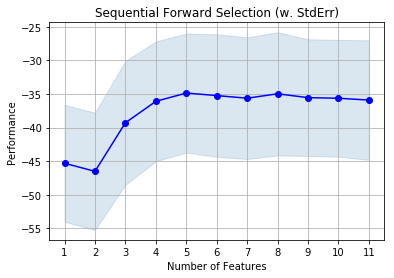

In [106]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

fig = plot_sfs(sfs.get_metric_dict(), kind='std_err')
plt.title('Sequential Forward Selection (w. StdErr)')
plt.grid()
plt.show()

In [107]:
sfs.k_features

11

In [108]:
sfs.k_feature_names_

('NSM',
 'Press_mm_hg',
 'T8',
 'T2',
 'RH_9',
 'T_out',
 'T6',
 'RH_1',
 'RH_2',
 'RH_6',
 'RH_out')

#### Sequential Backward Selection

In [83]:
x1_train.shape

(986, 14)

In [84]:
y1_train.shape

(986,)

In [85]:

sbs=SFS(selectModel,
        k_features=3,
        forward=False, 
        floating=False,
        n_jobs=-1,
        verbose=2,
        scoring='neg_mean_absolute_error',
        cv=11)
sbs=sbs.fit(x1_train.values,y1_train.values)



[Parallel(n_jobs=-1)]: Done   7 out of  14 | elapsed:    9.4s remaining:    9.4s
[Parallel(n_jobs=-1)]: Done  14 out of  14 | elapsed:   17.6s finished

[2018-11-04 21:53:57] Features: 13/6 -- score: -34.71493819105116[Parallel(n_jobs=-1)]: Done   5 out of  13 | elapsed:    9.9s remaining:   15.9s
[Parallel(n_jobs=-1)]: Done  13 out of  13 | elapsed:   17.7s finished

[2018-11-04 21:54:15] Features: 12/6 -- score: -34.24692211165965[Parallel(n_jobs=-1)]: Done   4 out of  12 | elapsed:   10.6s remaining:   21.2s
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:   18.4s finished

[2018-11-04 21:54:33] Features: 11/6 -- score: -33.940250302360795[Parallel(n_jobs=-1)]: Done   2 out of  11 | elapsed:    9.7s remaining:   43.5s
[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:    9.8s remaining:    3.7s
[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   16.5s finished

[2018-11-04 21:54:50] Features: 10/6 -- score: -33.56159122952131[Parallel(n_jobs=-1)]: Done   7 out of  10 | e

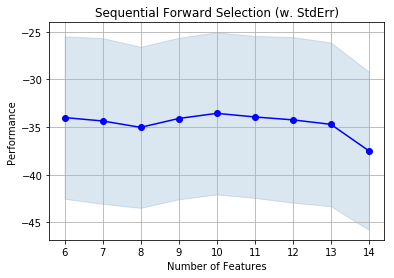

In [86]:
fig = plot_sfs(sbs.get_metric_dict(), kind='std_err')
plt.title('Sequential Forward Selection (w. StdErr)')
plt.grid()
plt.show()

In [87]:
sbs.k_feature_names_

('0', '2', '3', '4', '8', '11')

In [96]:
for i in sbs.k_feature_idx_:
    print(x_train.columns[i])

lights
RH_1
T2
RH_2
RH_4
T6


## Conclusion

In [ ]:
'NSM',
 'Press_mm_hg',
 'RH_1',
 'RH_2',
 'RH_3',
 'RH_6',
 'RH_7',
 'RH_8',
 'RH_9',
 'RH_out',
 'T2',
 'T6',
 'T8',
 'T_out'